In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from latexify import *
# Matplotlib retina
%config InlineBackend.figure_format = 'retina'

In [2]:
X = np.array([
    [1],
    [2],
    [3],
    [4],
    [5],
    [6]
])

y = np.array([1, 1, 1, 0, 0, 0])

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
lr = LogisticRegression(penalty='none',solver='newton-cg')

In [5]:
lr.fit(X, y)

/home/nipun.batra/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', solver='newton-cg')

In [6]:
lr.coef_

array([[-18.33148189]])

In [7]:
lr.intercept_

array([64.11147504])

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(z))

In [9]:
theta_0_li, theta_1_li = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

In [10]:
def cost_rmse(theta_0, theta_1):
    y_hat = sigmoid(theta_0 + theta_1*X)
    err = np.sum((y-y_hat)**2)
    return err

In [11]:
z = np.zeros((len(theta_0_li), len(theta_0_li)))
for i in range(len(theta_0_li)):
    for j in range(len(theta_0_li)):
        z[i, j] = cost_rmse(theta_0_li[i, j], theta_1_li[i, j])

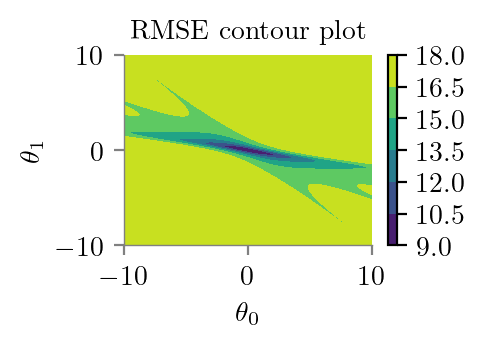

In [12]:
latexify()
plt.contourf(theta_0_li, theta_1_li, z)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.colorbar()
plt.title('RMSE contour plot')
format_axes(plt.gca())
plt.savefig("../figures/logistic-regression/logistic-sse-loss-contour.pdf", bbox_inches="tight", transparent=True)

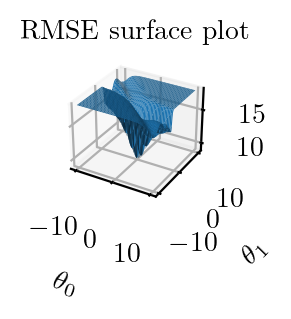

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
latexify()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_li, theta_1_li, z)
ax.set_title('RMSE surface plot')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.tight_layout()
plt.savefig("../figures/logistic-regression/logistic-sse-loss-3d.pdf", bbox_inches="tight", transparent=True)

In [14]:
import pandas as pd

In [15]:
pd.DataFrame(z).min().min()

9.01794626038055

In [16]:
def cost_2(theta_0, theta_1):
    y_hat = sigmoid(theta_0 + theta_1*X)
    
    err = -np.sum((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return err

In [17]:
z2 = np.zeros((len(theta_0_li), len(theta_0_li)))
for i in range(len(theta_0_li)):
    for j in range(len(theta_0_li)):
        z2[i, j] = cost_2(theta_0_li[i, j], theta_1_li[i, j])

/tmp/ipykernel_851067/1266618369.py:4: RuntimeWarning: divide by zero encountered in log
  err = -np.sum((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
/tmp/ipykernel_851067/1266618369.py:4: RuntimeWarning: invalid value encountered in multiply
  err = -np.sum((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))


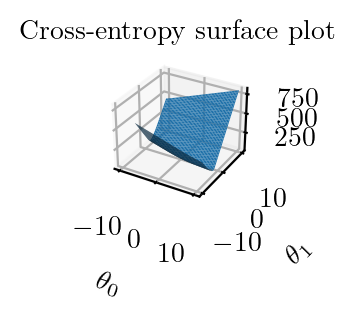

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

latexify()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_li, theta_1_li, z2)
ax.set_title('Cross-entropy surface plot')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.tight_layout()
plt.savefig("../figures/logistic-regression/logistic-cross-loss-surface.pdf", bbox_inches="tight", transparent=True)

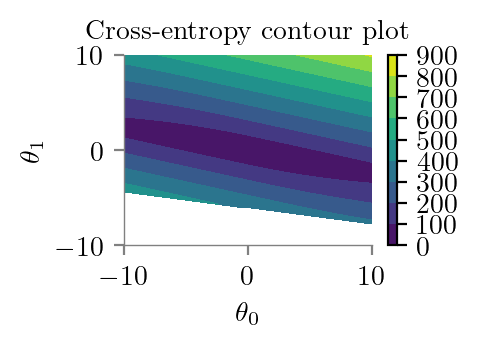

In [19]:
latexify()
plt.contourf(theta_0_li, theta_1_li, z2)
plt.title('Cross-entropy contour plot')
plt.colorbar()
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
format_axes(plt.gca())
plt.savefig("../figures/logistic-regression/logistic-cross-loss-contour.pdf", bbox_inches="tight", transparent=True)

In [21]:
y.shape, y_bar.shape

((6,), (10000,))

/tmp/ipykernel_851067/3960806875.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(y_bar, -y*np.log(y_bar) - (1-y)*np.log(1-y_bar))
/tmp/ipykernel_851067/3960806875.py:3: RuntimeWarning: invalid value encountered in multiply
  plt.plot(y_bar, -y*np.log(y_bar) - (1-y)*np.log(1-y_bar))
/tmp/ipykernel_851067/3960806875.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(y_bar, -y*np.log(y_bar) - (1-y)*np.log(1-y_bar))


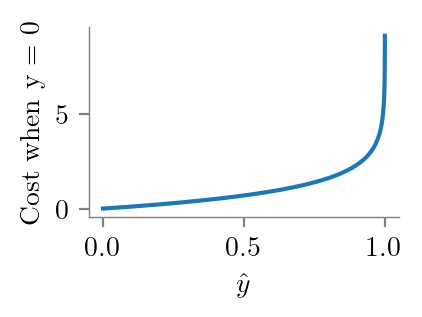

In [22]:
y = 0
y_bar = np.linspace(0, 1.1, 10000)
plt.plot(y_bar, -y*np.log(y_bar) - (1-y)*np.log(1-y_bar))
format_axes(plt.gca())
plt.ylabel("Cost when y = 0")
plt.xlabel(r'$\hat{y}$')
plt.savefig("../figures/logistic-regression/logistic-cross-cost-0.pdf", bbox_inches="tight", transparent=True)

/tmp/ipykernel_851067/210742206.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(y_bar, -y*np.log(y_bar) - (1-y)*np.log(1-y_bar))
/tmp/ipykernel_851067/210742206.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(y_bar, -y*np.log(y_bar) - (1-y)*np.log(1-y_bar))
/tmp/ipykernel_851067/210742206.py:3: RuntimeWarning: invalid value encountered in multiply
  plt.plot(y_bar, -y*np.log(y_bar) - (1-y)*np.log(1-y_bar))


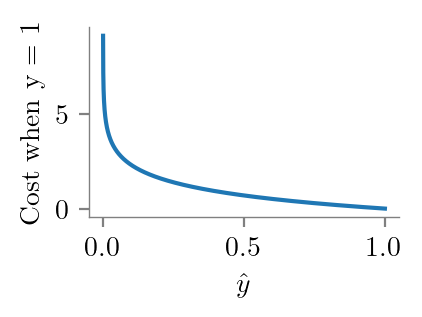

In [23]:
y = 1
y_bar = np.linspace(0, 1.1, 10000)
plt.plot(y_bar, -y*np.log(y_bar) - (1-y)*np.log(1-y_bar))
format_axes(plt.gca())
plt.ylabel("Cost when y = 1")
plt.xlabel(r'$\hat{y}$')
plt.savefig("../figures/logistic-regression/logistic-cross-cost-1.pdf", bbox_inches="tight", transparent=True)

### Likelihood

In [ ]:
X_with_one = np.hstack((np.ones_like(X), X))



\begin{align*}
P(y | X, \theta) &= \prod_{i=1}^{n} P(y_{i} | x_{i}, \theta) \\ &= \prod_{i=1}^{n} \Big\{\frac{1}{1 + e^{-x_{i}^{T}\theta}}\Big\}^{y_{i}}\Big\{1 - \frac{1}{1 + e^{-x_{i}^{T}\theta}}\Big\}^{1 - y_{i}} \\
\end{align*}

In [ ]:
X_with_one[1]

array([1, 2])

In [ ]:
def likelihood(theta_0, theta_1):
    s = 1

    for i in range(len(X)):
        y_i_hat = sigmoid(-X_with_one[i]@np.array([theta_0, theta_1]))
        s = s* ((y_i_hat**y[i])*(1-y_i_hat)**(1-y[i]))
    
    
    return s

x_grid_2, y_grid_2 = np.mgrid[-5:100:0.5, -30:10:.1]

li = np.zeros_like(x_grid_2)
for i in range(x_grid_2.shape[0]):
    for j in range(x_grid_2.shape[1]):
        li[i, j] = likelihood(x_grid_2[i, j], y_grid_2[i, j])
        

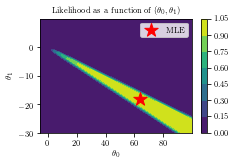

In [ ]:
plt.contourf(x_grid_2, y_grid_2, li)
#plt.gca().set_aspect('equal')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.colorbar()
plt.scatter(lr.intercept_[0], lr.coef_[0], s=200, marker='*', color='r', label='MLE')
plt.title(r"Likelihood as a function of ($\theta_0, \theta_1$)")
#plt.gca().set_aspect('equal')
plt.legend()
plt.savefig("../figures/logistic-regression/logistic-likelihood.pdf", bbox_inches="tight", transparent=True)